In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [238]:
num_votes = pd.read_csv('data.tsv', sep='\t') # data has num_votes and average rating
run_time = pd.read_csv('data-3.tsv', sep ='\t') # data has run_time for each film ID

/Users/MCJON/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [260]:
data = pd.merge(num_votes, run_time) # merge based off ID

In [297]:
data['runtimeMinutes'] = pd.to_numeric(run_time['runtimeMinutes'], errors='coerce').fillna(0).astype(np.int64) # convert to int
data['averageRating'] = pd.to_numeric(data['averageRating'], errors='coerce').fillna(0).astype(np.float64) # convert to float

In [298]:
data = data[(data[['averageRating']] > 0).all(axis=1)] # crop low ratings
data = data[((data[['runtimeMinutes']] <= 180) & (data[['runtimeMinutes']] > 0 )).all(axis=1)] # crop time

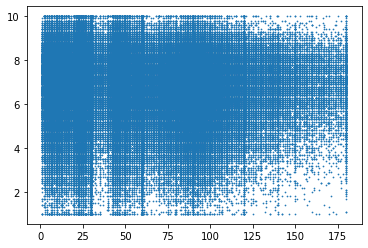

In [322]:
plt.scatter(data['runtimeMinutes'],data['averageRating'],0.5)
plt.savefig('IMBD_raw_eps.eps', format='eps')
plt.show()

In [300]:
bins = np.arange(0,180,1)
groups = data.groupby(np.digitize(data.runtimeMinutes, bins))

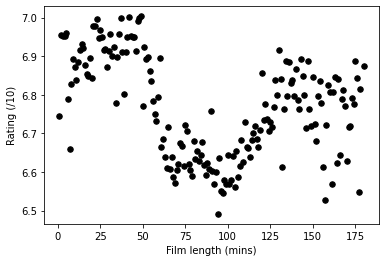

In [301]:
t = groups.mean().runtimeMinutes
r = groups.mean().averageRating
plt.scatter(t,r,30,marker='o',color = 'k')
plt.xlabel('Film length (mins)')
plt.ylabel('Rating (/10)')
#plt.ylim([0, 10])
plt.savefig('IMBD_raw.png', format='png', dpi = 1200)
plt.show()

In [302]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

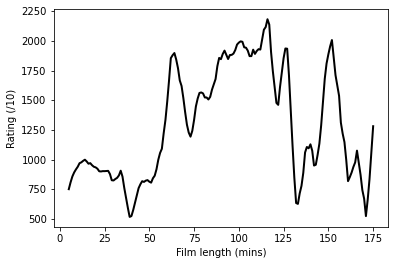

In [320]:
t = moving_average(t, 5)
r = moving_average(r, 5)
plt.plot(t,r,color = 'k',linewidth = 2)
plt.xlabel('Film length (mins)')
plt.ylabel('Rating (/10)')
plt.savefig('IMBD_smooth.png', format='png',dpi = 1200)
plt.show()

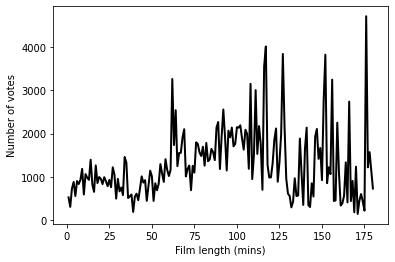

In [307]:
t = groups.mean().runtimeMinutes
r = groups.mean().numVotes
plt.plot(t,r,color = 'k',linewidth = 2)
plt.xlabel('Film length (mins)')
plt.ylabel('Number of votes')
plt.savefig('IMBD_number_votes.png', format='png',dpi = 1200)
plt.show()

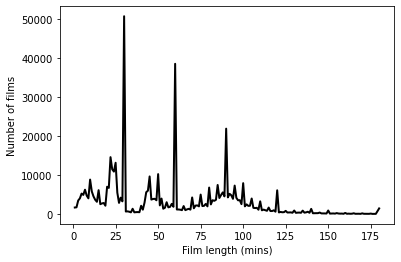

In [306]:
r = groups.mean().runtimeMinutes
r = groups.count().tconst
plt.plot(t,r,color = 'k',linewidth = 2)
plt.xlabel('Film length (mins)')
plt.ylabel('Number of films')
plt.savefig('IMBD_number.png', format='png',dpi = 1200)
plt.show()

In [312]:
print(data.head(12))

       tconst  averageRating  numVotes titleType  \
0   tt0000001            5.7      1680     short   
1   tt0000002            6.0       207     short   
2   tt0000003            6.5      1418     short   
3   tt0000004            6.1       122     short   
4   tt0000005            6.1      2214     short   
5   tt0000006            5.3       120     short   
6   tt0000007            5.4       675     short   
7   tt0000008            5.4      1855     short   
8   tt0000009            6.0       156     short   
9   tt0000010            6.9      6206     short   
10  tt0000011            5.2       276     short   
11  tt0000012            7.4     10656     short   

                                   primaryTitle  \
0                                    Carmencita   
1                        Le clown et ses chiens   
2                                Pauvre Pierrot   
3                                   Un bon bock   
4                              Blacksmith Scene   
5                

In [318]:
print(groups.numVotes)